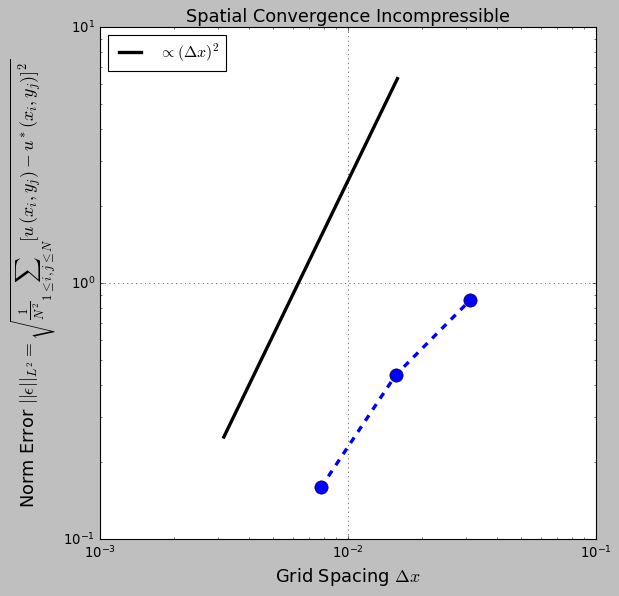

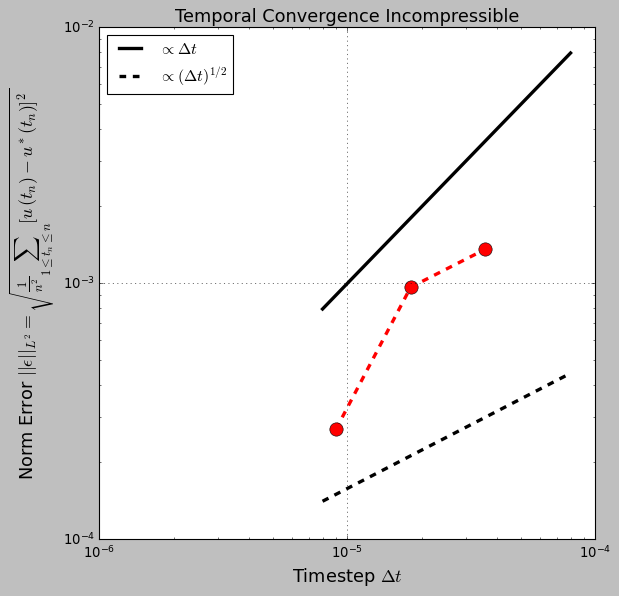

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
import argparse

###################################### Spatial Convergence #################################################
Time = 9

ds_16 = h5py.File(f"data/spat_conv_16/test.output.{str(Time).zfill(4)}.h5", "r")
ds_16 = np.rot90(ds_16["VelX1"][:].reshape(16 + 2, 16 + 2)[1:-1, 1:-1], 3)

ds_32 = h5py.File(f"data/spat_conv_32/test.output.{str(Time).zfill(4)}.h5", "r")
ds_32 = np.rot90(ds_32["VelX1"][:].reshape(32 + 2, 32 + 2)[1:-1, 1:-1], 3)

ds_64 = h5py.File(f"data/spat_conv_64/test.output.{str(Time).zfill(4)}.h5", "r")
ds_64 = np.rot90(ds_64["VelX1"][:].reshape(64 + 2, 64 + 2)[1:-1, 1:-1], 3)

ds_128 = h5py.File(f"data/spat_conv_128/test.output.{str(Time).zfill(4)}.h5", "r")
ds_128 = np.rot90(ds_128["VelX1"][:].reshape(128 + 2, 128 + 2)[1:-1, 1:-1], 3)

eps_128_64 = abs(ds_128[5, 128 // 2] - ds_64[5, 64 // 2])
eps_128_32 = abs(ds_128[5, 128 // 2] - ds_32[5, 32 // 2])
eps_128_16 = abs(ds_128[5, 128 // 2] - ds_16[5, 16 // 2])

dxs = [1 / 128, 1 / 64, 1 / 32]
eps = [eps_128_64, eps_128_32, eps_128_16]

plt.style.use("classic")
fig = plt.figure(figsize=(8, 8))

plt.plot(dxs, eps, "--", marker="o", markersize=12, linewidth=3, color="blue")
plt.plot(
    0.2 * (np.logspace(-1.8, -1.1, 100)),
    1000 * (np.logspace(-1.8, -1.1, 100)) ** (2),
    "-",
    linewidth=3,
    color="black",
    label="$\propto (\Delta x)^{2}$",
)

plt.yscale("log")
plt.xscale("log")

plt.xlabel(r"Grid Spacing $\Delta x$", fontsize=16)
plt.ylabel(
    r"Norm Error $||\epsilon||_{L^2} = \sqrt{\frac{1}{N^2} \sum_{1 \leq i,j \leq N} [u \, (x_i, y_j) - u^*(x_i, y_j)]^2}$",
    #    r"Norm Error $||\epsilon||_{L^2} = \sqrt{\frac{1}{N^2} \sum_{1 \leq j \leq N} [u \, (x_j, t) - u^*(x_j, t)]^2}$",
    fontsize=16,
)
plt.title(r"Spatial Convergence Incompressible", fontsize=16)

plt.minorticks_on()
plt.legend(loc="upper left")
plt.grid()

plt.savefig("spatial_convergence.png", bbox_inches="tight", dpi=1200)
plt.show()
plt.close()

# print((eps[-1] - eps[0])/(dxs[-1] - dxs[0]))

###################################### Temporal Convergence ############################################

Time = 9

ds_01 = h5py.File(f"data/time_conv_01/test.output.{str(Time).zfill(4)}.h5", "r")
ds_01 = np.rot90(ds_01["VelX1"][:].reshape(64 + 2, 64 + 2)[1:-1, 1:-1], 3)

ds_005 = h5py.File(f"data/time_conv_005/test.output.{str(Time).zfill(4)}.h5", "r")
ds_005 = np.rot90(ds_005["VelX1"][:].reshape(64 + 2, 64 + 2)[1:-1, 1:-1], 3)

ds_001 = h5py.File(f"data/time_conv_001/test.output.{str(Time).zfill(4)}.h5", "r")
ds_001 = np.rot90(ds_001["VelX1"][:].reshape(64 + 2, 64 + 2)[1:-1, 1:-1], 3)

ds_0005 = h5py.File(f"data/time_conv_0005/test.output.{str(Time).zfill(4)}.h5", "r")
ds_0005 = np.rot90(ds_0005["VelX1"][:].reshape(64 + 2, 64 + 2)[1:-1, 1:-1], 3)

eps_0005_001 = abs(ds_0005[5, 64 // 2] - ds_001[5, 64 // 2])
eps_0005_005 = abs(ds_0005[5, 64 // 2] - ds_005[5, 64 // 2])
eps_0005_01 = abs(ds_0005[5, 64 // 2] - ds_01[5, 64 // 2])

dts = [9.00087e-06, 2 * 9.00087e-06, 4 * 9.00087e-06]
eps = [eps_0005_001, eps_0005_005, eps_0005_01]

plt.style.use("classic")
fig = plt.figure(figsize=(8, 8))

plt.plot(dts, eps, "--", marker="o", markersize=12, linewidth=3, color="red")
plt.plot(
    np.logspace(-5.1, -4.1, 100),
    100 * (np.logspace(-5.1, -4.1, 100)),
    "-",
    linewidth=3,
    color="black",
    label="$\propto \Delta t$",
)
plt.plot(
    np.logspace(-5.1, -4.1, 100),
    0.05 * (np.logspace(-5.1, -4.1, 100)) ** (1 / 2),
    "--",
    linewidth=3,
    color="black",
    label="$\propto (\Delta t)^{1/2}$",
)

plt.yscale("log")
plt.xscale("log")

plt.xlabel(r"Timestep $\Delta t$", fontsize=16)
plt.ylabel(
    r"Norm Error $||\epsilon||_{L^2} = \sqrt{\frac{1}{n^2} \sum_{1 \leq t_n \leq n} [u \, (t_n) - u^*(t_n)]^2}$",
    fontsize=16,
)
plt.title(r"Temporal Convergence Incompressible", fontsize=16)

plt.minorticks_on()
plt.legend(loc="upper left")
plt.grid()

plt.savefig("temporal_convergence.png", bbox_inches="tight", dpi=1200)
plt.show()
plt.close()

# print((eps[-1] - eps[0])/(dts[-1] - dts[0]))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable
import argparse

field_key = {
    "Density": "Density",
    "VelX1": "X-Velocity",
    "VelX2": "Y-Velocity",
    "Press": "Pressure",
    "Temp": "Temperature",
    "VelMag": "Velocity Magnitude",
    "dpdx": "dpdx",
    "dpdy": "dpdy",
}

parser = argparse.ArgumentParser()

parser.add_argument("-d", "--directory", help="Directory containing plotting files")

parser.add_argument("-f", "--field", help="Field to plot")

parser.add_argument("-n", "--ngrid", help="Number of grid cells of simulation")

parser.add_argument(
    "--dt", help="Number of seconds (in omega * t) between data output saves"
)

parser.add_argument(
    "-g", "--ng", help="Include ghost zones in plot", action="store_true"
)

parser.add_argument(
    "-m", "--multi", help="Generate multipanel plot of Mach number", action="store_true"
)
args = parser.parse_args()

N = int(args.ngrid)
# print(N)

gmax, gmin = 0.0, 1e20

for f in tqdm(
    sorted(glob.glob(f"{args.directory}/*.h5")), desc="Getting max and min vals :"
):

    strnum = f.split(".")[-2]
    # print(float(strnum))
    ds = h5py.File(f, "r")

    field = args.field

    if args.field == "VelMag":
        u = np.rot90(ds["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
        v = np.rot90(ds["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

        plotarray = np.sqrt(u**2 + v**2)
    else:
        plotarray = np.rot90(ds[field][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

    if args.field == "Press":
        print(
            (plotarray[1, :] - plotarray[0, :]).min(),
            (plotarray[:, 1] - plotarray[:, 0]).min(),
        )
    pmax = np.amax(plotarray)
    pmin = np.amin(plotarray)
    if pmax > gmax:
        gmax = pmax
    else:
        gmax = gmax

    if pmin < gmin:
        gmin = pmin
    else:
        gmin = gmin


for f in tqdm(
    sorted(glob.glob(f"{args.directory}/*.h5")),
    desc=f"Plotting {field_key[args.field]} :",
):

    strnum = f.split(".")[-2]
    ds = h5py.File(f, "r")

    field = args.field

    if args.field == "VelMag":
        if args.ng:
            u = np.rot90(ds["VelX1"][:].reshape(N + 2, N + 2)[:, :], 3)
            v = np.rot90(ds["VelX2"][:].reshape(N + 2, N + 2)[:, :], 3)
        else:
            u = np.rot90(ds["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
            v = np.rot90(ds["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

        plotarray = np.sqrt(u**2 + v**2)
    else:
        if args.ng:
            plotarray = np.rot90(ds[field][:].reshape(N + 2, N + 2)[:, :], 3)
        else:
            plotarray = np.rot90(ds[field][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

    fig, ax = plt.subplots(figsize=(8, 8))

    x, y = np.linspace(0, 1, len(plotarray)), np.linspace(0, 1, len(plotarray))
    X, Y = np.meshgrid(x, y)

    plt.title(
        rf"{field_key[field]}, $\omega t$ = {round(float(strnum) * float(args.dt),7)}",
        fontsize=16,
    )

    im = ax.pcolormesh(X, Y, plotarray, cmap="jet", vmax=gmax, vmin=gmin)

    # if args.field == "VelMag":
    #     ax.quiver(X,Y,u,v)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.02)
    fig.add_axes(cax)
    fig.colorbar(im, cax=cax)

    plt.savefig(f"{field}_{strnum}_lid.png", bbox_inches="tight", dpi=1200)
    plt.show()
    plt.close()

if args.multi:

    strnum = "0100"
    strnum_08 = "0020"

    f_08 = f"C:\Users\micha\OneDrive\Documents\CTRFL\MAE557\Project2\Ma_08\test.output.{strnum_08}.h5"
    f_04 = f"C:\Users\micha\OneDrive\Documents\CTRFL\MAE557\Project2\Ma_04\test.output.{strnum}.h5"
    f_02 = f"C:\Users\micha\OneDrive\Documents\CTRFL\MAE557\Project2\Ma_02\test.output.{strnum}.h5"
    f_01 = f"C:\Users\micha\OneDrive\Documents\CTRFL\MAE557\Project2\Ma_01\test.output.{strnum}.h5"

    ds_08 = h5py.File(f_08, "r")
    ds_04 = h5py.File(f_04, "r")
    ds_02 = h5py.File(f_02, "r")
    ds_01 = h5py.File(f_01, "r")

    field = args.field

    if args.field == "VelMag":
        u_08 = np.rot90(ds_08["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
        v_08 = np.rot90(ds_08["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

        plotarray_08 = np.sqrt(u_08**2 + v_08**2)

        u_04 = np.rot90(ds_04["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
        v_04 = np.rot90(ds_04["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

        plotarray_04 = np.sqrt(u_04**2 + v_04**2)

        u_02 = np.rot90(ds_02["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
        v_02 = np.rot90(ds_02["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

        plotarray_02 = np.sqrt(u_02**2 + v_02**2)

        u_01 = np.rot90(ds_01["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
        v_01 = np.rot90(ds_01["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

        plotarray_01 = np.sqrt(u_01**2 + v_01**2)
    else:
        plotarray = np.rot90(ds[field][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

    fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

    im_08 = ax[0, 0].pcolormesh(
        X,
        Y,
        plotarray_08,
        cmap="jet",
        vmax=np.amax(plotarray_08),
        vmin=np.amin(plotarray_08),
    )
    ax[0, 0].set_title(r"$\mathrm{Ma} = 0.8$")

    im_04 = ax[0, 1].pcolormesh(
        X,
        Y,
        plotarray_04,
        cmap="jet",
        vmax=np.amax(plotarray_04),
        vmin=np.amin(plotarray_04),
    )
    ax[0, 1].set_title(r"$\mathrm{Ma} = 0.4$")

    im_02 = ax[1, 0].pcolormesh(
        X,
        Y,
        plotarray_02,
        cmap="jet",
        vmax=np.amax(plotarray_02),
        vmin=np.amin(plotarray_02),
    )
    ax[1, 0].set_title(r"$\mathrm{Ma} = 0.2$")

    im_01 = ax[1, 1].pcolormesh(
        X,
        Y,
        plotarray_01,
        cmap="jet",
        vmax=np.amax(plotarray_01),
        vmin=np.amin(plotarray_01),
    )
    ax[1, 1].set_title(r"$\mathrm{Ma} = 0.1$")

    divider = make_axes_locatable(ax[0, 1])
    cax = divider.append_axes("right", size="5%", pad=0.02)
    fig.add_axes(cax)
    fig.colorbar(im_04, cax=cax)

    divider = make_axes_locatable(ax[1, 1])
    cax = divider.append_axes("right", size="5%", pad=0.02)
    fig.add_axes(cax)
    fig.colorbar(im_01, cax=cax)

    divider = make_axes_locatable(ax[0, 0])
    cax = divider.append_axes("right", size="5%", pad=0.02)
    fig.add_axes(cax)
    fig.colorbar(im_08, cax=cax)

    divider = make_axes_locatable(ax[1, 0])
    cax = divider.append_axes("right", size="5%", pad=0.02)
    fig.add_axes(cax)
    fig.colorbar(im_02, cax=cax)

    plt.savefig("multiplot.png", bbox_inches="tight", dpi=1200)
    plt.show()
    plt.close()


In [ ]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

field_key = {
    "Density": "Density",
    "VelX1": "X-Velocity",
    "VelX2": "Y-Velocity",
    "Press": "Pressure",
    "Temp": "Temperature",
    "VelMag": "Velocity Magnitude",
    "dpdx": "dpdx",
    "dpdy": "dpdy",
}

dt = 0.1

Time = 9

ds_08 = h5py.File(f"/data/spat_conv_128/test.output.{str(Time).zfill(4)}.h5", "r")
ds_05 = h5py.File(f"/data/spat_conv_128/test.output.{str(Time).zfill(4)}.h5", "r")
ds_01 = h5py.File(f"/data/spat_conv_128/test.output.{str(Time).zfill(4)}.h5", "r")
ds_25 = h5py.File(f"/data/spat_conv_128/test.output.{str(Time).zfill(4)}.h5", "r")

gmax, gmin = 0.0, 1e20

N = 128
field = "VelMag"

for i, ds in enumerate([ds_25, ds_01, ds_05, ds_08]):

    u = np.rot90(ds["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
    v = np.rot90(ds["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

    plotarray = np.sqrt(u**2 + v**2) / np.sqrt(u**2 + v**2).max()

    pmax = np.amax(plotarray)
    pmin = np.amin(plotarray)
    if pmax > gmax:
        gmax = pmax
    else:
        gmax = gmax

    if pmin < gmin:
        gmin = pmin
    else:
        gmin = gmin


fig, ax = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

Mas = [0.025, 0.1, 0.5, 0.8]

for i, ds in enumerate([ds_25, ds_01, ds_05, ds_08]):

    u = np.rot90(ds["VelX1"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)
    v = np.rot90(ds["VelX2"][:].reshape(N + 2, N + 2)[1:-1, 1:-1], 3)

    plotarray = np.sqrt(u**2 + v**2) / np.sqrt(u**2 + v**2).max()

    x, y = np.linspace(0, 1, len(plotarray)), np.linspace(0, 1, len(plotarray))
    X, Y = np.meshgrid(x, y)

    im = ax[i].pcolormesh(X, Y, plotarray, cmap="jet", vmax=gmax, vmin=gmin)
    ax[i].set_title(f"$\mathrm{{Ma}} = ${Mas[i]}")
    if i == 3:
        divider = make_axes_locatable(ax[i])
        cax = divider.append_axes("right", size="5%", pad=0.02)
        fig.add_axes(cax)
        fig.colorbar(im, cax=cax)

fig.suptitle(
    rf"Normalized {field_key[field]}, $\omega t = ${round(float(Time) * float(dt),7)}",
    fontsize=16,
)
fig.tight_layout()

plt.savefig(f"Ma_comparison.png", bbox_inches="tight", dpi=1200)
plt.show()
plt.close()
